In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
import numpy as np
from sklearn.metrics import auc, roc_auc_score
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%config InlineBackend.figure_format = 'png'
import time
from datetime import datetime
from dateutil import relativedelta

TODO:
<p> Check statics variables ans create static dataframes </p>
<p>-convert dates</p>
<p>-How to deal with ages?</p>
<p>-Check how to deal with dynamic values</p>
<ul>
<li> In the case a customer buy a product and leave it?</li>
</ul>
<p>-Methods to test:</p>
<ul>
<li> Association rules</li>
<li> Recommender systems (duration the customer held a product</li>
<li> Xgboost logistic: keep all what the customer has as prediction variable, and use it to predict what he will have</li>
</ul>

Link to the competition: https://www.kaggle.com/c/santander-product-recommendation

In [2]:
train = pd.read_csv('../Data/train_ver2.csv', sep=',')
test = pd.read_csv('../Data/test_ver2.csv', sep=',')

/home/datageek/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/datageek/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.shape

(13647309, 48)

In [4]:
test.shape

(929615, 24)

In [5]:
train.head(2)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [84]:
cust1375586 = train.ix[train.ncodpers==1375586, :]

In [6]:
test.head(2)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES


### Splitting the training data by pred cols & target cols

In [7]:
train_target = train.ix[:,24:48]
train_pred = train.ix[:,0:24]

In [8]:
train_pred.head(2)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO


In [9]:
train_target.head(2)

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [12]:
target_repr = train_target.sum()

In [46]:
#ind_cco_fin_ult1 
#target_repr.sort_values()

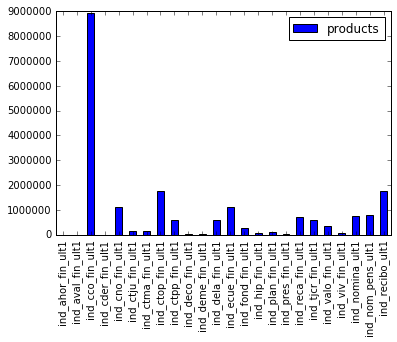

In [21]:
plt.figure(); target_repr.plot(kind='bar', label='products'); plt.legend()

## First stupid draft

### Dataframe aggregation by customers

In [77]:
cust1375586.ix[:, range(0,23)]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1
1047196,2015-02-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1
1681276,2015-03-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1
2299297,2015-04-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1
2714121,2015-05-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1
3343336,2015-06-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1
4581564,2015-07-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1
5075380,2015-08-28,1375586,N,ES,H,36,2015-01-12,0.0,7,1.0,...,S,N,NaN,KHL,N,1.0,29.0,MALAGA,0.0,87218.1
6258167,2015-09-28,1375586,N,ES,H,36,2015-01-12,0.0,8,1.0,...,S,N,NaN,KHL,N,1.0,29.0,MALAGA,0.0,87218.1
6572487,2015-10-28,1375586,N,ES,H,36,2015-01-12,0.0,9,1.0,...,S,N,NaN,KHL,N,1.0,29.0,MALAGA,0.0,87218.1


In [88]:
# compute the seniority
def compute_senority(cust_row):
    date_subscr = datetime.strptime(cust_row['fecha_alta'], '%Y-%m-%d')
    date_curr = datetime.strptime(cust_row['fecha_dato'], '%Y-%m-%d')
    r = (date_curr.year - date_subscr.year)*12 + date_curr.month - date_subscr.month
    return r
def delete_uselessvars(datafr):
    del datafr['antiguedad']
    del datafr['fecha_dato']
    del datafr['fecha_alta']
    return datafr

In [89]:
cust1375586['seniority'] = cust1375586.apply(compute_senority, axis = 1)
cust1375586 = delete_uselessvars(cust1375586)

/home/datageek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [90]:
cust1375586

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,seniority
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1047196,2015-02-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1681276,2015-03-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
2299297,2015-04-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,3
2714121,2015-05-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,1,4
3343336,2015-06-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,1,5
4581564,2015-07-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,1,6
5075380,2015-08-28,1375586,N,ES,H,36,2015-01-12,0.0,7,1.0,...,0,0,0,0,0,0,0.0,0.0,0,7
6258167,2015-09-28,1375586,N,ES,H,36,2015-01-12,0.0,8,1.0,...,0,0,0,0,0,0,0.0,0.0,0,8
6572487,2015-10-28,1375586,N,ES,H,36,2015-01-12,0.0,9,1.0,...,0,0,0,0,0,0,0.0,0.0,0,9


In [91]:
train.ix[train.ncodpers==1170544, 0:20]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov
235546,2015-01-28,1170544,N,ES,H,35,2013-08-28,0.0,23,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0
1010103,2015-02-28,1170544,N,ES,H,35,2013-08-28,0.0,23,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0
1612348,2015-03-28,1170544,N,ES,H,35,2013-08-28,0.0,23,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0
2269158,2015-04-28,1170544,N,ES,H,35,2013-08-28,0.0,23,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0
2781589,2015-05-28,1170544,N,ES,H,35,2013-08-28,0.0,23,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0
3415166,2015-06-28,1170544,N,ES,H,35,2013-08-28,0.0,23,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0
4279467,2015-07-28,1170544,N,ES,H,35,2013-08-28,0.0,23,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0
5245288,2015-08-28,1170544,N,ES,H,35,2013-08-28,0.0,24,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0
6148557,2015-09-28,1170544,N,ES,H,35,2013-08-28,0.0,25,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0
6415485,2015-10-28,1170544,N,ES,H,35,2013-08-28,0.0,26,1.0,NaN,1,I,S,N,NaN,KAT,N,1.0,3.0
